In [1]:
import pandas as pd, numpy as np, json, os

In [2]:
base_url='http://www.cdep.ro'

In [145]:
os.chdir('E:/Onedrive - Lancaster University/datarepo/influence/ro')

In [146]:
nmembers=json.loads(open('data/nmembers.json','r').read())

In [89]:
img=json.loads(open('data/img.json','r').read())

In [6]:
legs={'2016':['2016-12-21','2019-05-01'],
'2012':['2012-12-20','2016-12-21'],
'2008':['2008-12-19','2012-12-20'],
'2004':['2004-12-19','2008-12-13'],
'2000':['2000-12-15','2004-11-30'],
'1996':['1996-11-27','2000-11-30'],
'1992':['1992-10-28','1996-11-22'],
'1990':['1990-06-19','1992-10-16']}

In [7]:
import altair as alt

In [12]:
from colorthief import ColorThief
import requests

In [13]:
party_imgs={}
for p in img['party']:
    i=img['party'][p]['img']
    if i:
        color_thief = ColorThief('img2/'+p.lower()+'.png')
        rgb_color=color_thief.get_color(quality=1)        
        z='#%02x%02x%02x' % rgb_color
    else:
        try:
            color_thief = ColorThief('img/'+p.lower()+'.png')
            rgb_color=color_thief.get_color(quality=1)        
            z='#%02x%02x%02x' % rgb_color
        except:
            z='grey'
    
    party_imgs[p]=z

In [14]:
party_imgs['UDMR']='green'
party_imgs['PNL']='#f4d42c'
party_imgs['ALDE']='#046cab'

In [15]:
colors=pd.DataFrame(party_imgs,index=['Color']).T

In [17]:
plinks={}
for i in colors.index:
    print(i+':'+colors.loc[i]['Color'])
    plinks[i]='https://influence.csaladen.es/ro/img/'+i.lower()+'.png'

PNL:#f4d42c
PSD:#db231b
PNTCD:#04843c
FSN:grey
PD:#f17122
PDL:#f74c06
MER:grey
PDSR:#ebedf1
PER:grey
UDMR:green
PUR-SL:#2877b8
PC:#96c2f2
PRM:#d1b80e
PAC:grey
PUNR:grey
PMP:#0484cc
UNPR:#4b386d
FDSN:grey
PDAR:grey
ALDE:#046cab
PP-DD:#d7c9e0
PSDR:#2e2f26
PSM:grey
USR:#04abe4
PNL-AT:grey
PL'93:grey
FER:grey
PNL-CD:grey
PLS:grey
ULB:grey
FC:#1d7aad
PAR:grey
GDC:grey
PRNR:grey
AUR:grey
PDM:grey
PTLDR:grey
Independent:#eeeeee
Minorități:grey


Members

In [725]:
szen=['🔼 Szenátus','🔽 Képviselőház']
szen2=['Senat','Camera Deputaților']

In [726]:
istart=legs['1990'][0]
iend='2019-05-01'

In [727]:
m=nmembers['Popescu-Tariceanu Calin Constantin Anton']
data=[]
for p in m['Parties']:
    start=pd.to_datetime(p['start'])
    end=pd.to_datetime(p['end'])    
    d={}
    d['Name']=m['Name']['full']
    d['Csoportok']=p['party']
    d['Típus']='Párt'
    d['start']=start
    d['end']=end
    d['duration']=pd.to_timedelta(end-start).days
    data.append(d)
    d=dict(d)
    d['Csoportok']=p['judet']
    d['Típus']='Megye'
    data.append(d)
for p in m['Countries']:
    start=pd.to_datetime(p['start'])
    end=pd.to_datetime(p['end'])    
    d={}
    d['Name']=m['Name']['full']
    d['Csoportok']=p['country']
    d['Típus']='Ország'
    d['start']=start
    d['end']=end
    d['duration']=pd.to_timedelta(end-start).days
    data.append(d)
for p in m['Groups']:
    start=pd.to_datetime(p['start'])
    end=pd.to_datetime(p['end'])    
    d={}
    d['Name']=m['Name']['full']
    d['Csoportok']=p['group'].replace('Comisia pentru','').replace('Comisia','').strip().capitalize()
    d['Típus']='Bizottság'
    d['start']=start
    d['end']=end
    d['duration']=pd.to_timedelta(end-start).days
    data.append(d)
for p in m['Link']:
    start=pd.to_datetime(legs[p[-10:-6]][0])
    end=pd.to_datetime(legs[p[-10:-6]][1])    
    d={}
    d['Name']=m['Name']['full']
    d['Csoportok']=szen2[int(p[-1])-1]
    d['Típus']='Kamara'
    d['start']=start
    d['end']=end
    d['duration']=pd.to_timedelta(end-start).days
    data.append(d)
ef=pd.DataFrame(data)
eord=ef.groupby('Típus').sum()
eord['duration']=[1,60,30,4,50]
eord.columns=['order']
ef=ef.set_index('Típus').join(eord).reset_index()

In [728]:
ef

,Típus,Csoportok,Name,duration,end,start,order
0,Bizottság,Economică,Călin Constantin Anton POPESCU-TĂRICEANU,850,1992-10-16,1990-06-19,1
1,Bizottság,"Învăţământ, ştiinţă, tineret, sport",Călin Constantin Anton POPESCU-TĂRICEANU,850,1992-10-16,1990-06-19,1
2,Bizottság,Politică externă,Călin Constantin Anton POPESCU-TĂRICEANU,1462,2012-12-20,2008-12-19,1
3,Bizottság,Politică externă,Călin Constantin Anton POPESCU-TĂRICEANU,436,2014-03-01,2012-12-20,1
4,Bizottság,"Buget, finanţe şi bănci",Călin Constantin Anton POPESCU-TĂRICEANU,1446,2004-11-30,2000-12-15,1
5,Bizottság,"Drepturile omului, culte şi problemele minorit...",Călin Constantin Anton POPESCU-TĂRICEANU,1455,2008-12-13,2004-12-19,1
6,Bizottság,"Politică economică, reformă şi privatizare",Călin Constantin Anton POPESCU-TĂRICEANU,1464,2000-11-30,1996-11-27,1
7,Kamara,Camera Deputaților,Călin Constantin Anton POPESCU-TĂRICEANU,850,1992-10-16,1990-06-19,60
8,Kamara,Camera Deputaților,Călin Constantin Anton POPESCU-TĂRICEANU,1462,2012-12-20,2008-12-19,60
9,Kamara,Senat,Călin Constantin Anton POPESCU-TĂRICEANU,1462,2016-12-21,2012-12-20,60


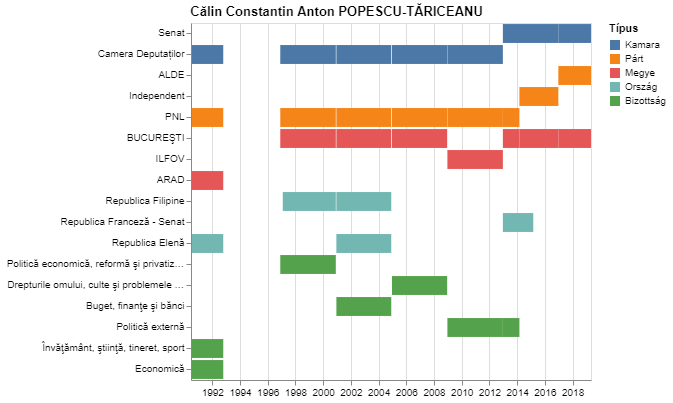

In [729]:
alt.Chart(ef,
          title=m['Name']['full']
         ).mark_bar().encode(
    x=alt.X('start:T',title=''),
    x2='end:T',
    y=alt.Y('Csoportok:N',title='',
            sort=alt.EncodingSortField(field="order", op="mean", order='descending')),
    color=alt.Color('Típus:N',
        sort=alt.EncodingSortField(field="order", op="mean", order='descending'))
)

In [730]:
m=nmembers['Kelemen Hunor']
data=[]
for p in m['Parties']:
    start=pd.to_datetime(p['start'])
    end=pd.to_datetime(p['end'])    
    d={}
    d['Name']=m['Name']['full']
    d['Csoportok']=p['party']
    d['Típus']='Párt'
    d['start']=start
    d['end']=end
    d['duration']=pd.to_timedelta(end-start).days
    data.append(d)
    d=dict(d)
    d['Csoportok']=p['judet']
    d['Típus']='Megye'
    data.append(d)
for p in m['Countries']:
    start=pd.to_datetime(p['start'])
    end=pd.to_datetime(p['end'])    
    d={}
    d['Name']=m['Name']['full']
    d['Csoportok']=p['country']
    d['Típus']='Ország'
    d['start']=start
    d['end']=end
    d['duration']=pd.to_timedelta(end-start).days
    data.append(d)
for p in m['Groups']:
    start=pd.to_datetime(p['start'])
    end=pd.to_datetime(p['end'])    
    d={}
    d['Name']=m['Name']['full']
    d['Csoportok']=p['group'].replace('Comisia pentru','').replace('Comisia','').strip().capitalize()
    d['Típus']='Bizottság'
    d['start']=start
    d['end']=end
    d['duration']=pd.to_timedelta(end-start).days
    data.append(d)
for p in m['Link']:
    start=pd.to_datetime(legs[p[-10:-6]][0])
    end=pd.to_datetime(legs[p[-10:-6]][1])    
    d={}
    d['Name']=m['Name']['full']
    d['Csoportok']=szen2[int(p[-1])-1]
    d['Típus']='Kamara'
    d['start']=start
    d['end']=end
    d['duration']=pd.to_timedelta(end-start).days
    data.append(d)
ef=pd.DataFrame(data)
eord=ef.groupby('Típus').sum()
eord['duration']=[1,60,30,4,50]
eord.columns=['order']
ef=ef.set_index('Típus').join(eord).reset_index()

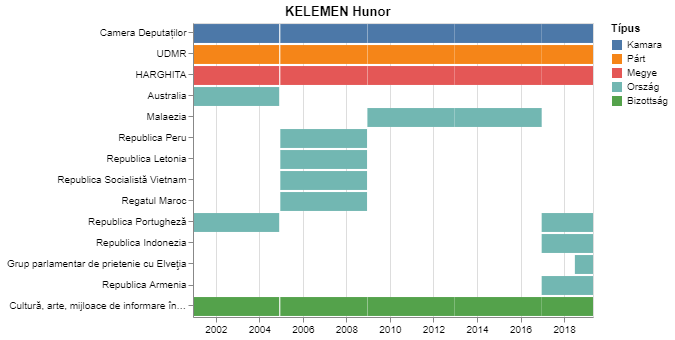

In [731]:
viz=alt.Chart(ef,
          title=m['Name']['full'].replace('DRAGNEA','DRAGNEA - ')
         ).mark_bar().encode(
    x=alt.X('start:T',title=''),
    x2='end:T',
    y=alt.Y('Csoportok:N',title='',
            sort=alt.EncodingSortField(field="order", op="mean", order='descending')),
    color=alt.Color('Típus:N',
        sort=alt.EncodingSortField(field="order", op="mean", order='descending'))
)
viz.save('viz.json')
viz

In [732]:
m=nmembers['Dragnea Nicolae-Liviu']
data=[]
for p in m['Parties']:
    start=pd.to_datetime(p['start'])
    end=pd.to_datetime(p['end'])    
    d={}
    d['Name']=m['Name']['full']
    d['Csoportok']=p['party']
    d['Típus']='Párt'
    d['start']=start
    d['end']=end
    d['duration']=pd.to_timedelta(end-start).days
    data.append(d)
    d=dict(d)
    d['Csoportok']=p['judet']
    d['Típus']='Megye'
    data.append(d)
for p in m['Countries']:
    start=pd.to_datetime(p['start'])
    end=pd.to_datetime(p['end'])    
    d={}
    d['Name']=m['Name']['full']
    d['Csoportok']=p['country']
    d['Típus']='Ország'
    d['start']=start
    d['end']=end
    d['duration']=pd.to_timedelta(end-start).days
    data.append(d)
for p in m['Groups']:
    start=pd.to_datetime(p['start'])
    end=pd.to_datetime(p['end'])    
    d={}
    d['Name']=m['Name']['full']
    d['Csoportok']=p['group'].replace('Comisia pentru','').replace('Comisia','').strip().capitalize()
    d['Típus']='Bizottság'
    d['start']=start
    d['end']=end
    d['duration']=pd.to_timedelta(end-start).days
    data.append(d)
for p in m['Link']:
    start=pd.to_datetime(legs[p[-10:-6]][0])
    end=pd.to_datetime(legs[p[-10:-6]][1])    
    d={}
    d['Name']=m['Name']['full']
    d['Csoportok']=szen2[int(p[-1])-1]
    d['Típus']='Kamara'
    d['start']=start
    d['end']=end
    d['duration']=pd.to_timedelta(end-start).days
    data.append(d)
ef=pd.DataFrame(data)
eord=ef.groupby('Típus').sum()
eord['duration']=[1,60,30,4,50]
eord.columns=['order']
ef=ef.set_index('Típus').join(eord).reset_index()

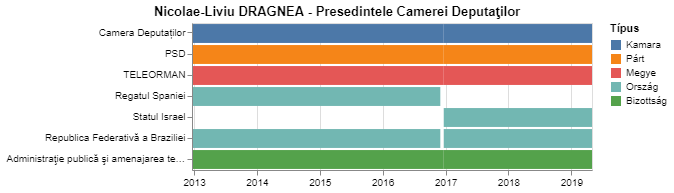

In [733]:
viz=alt.Chart(ef,
          title=m['Name']['full'].replace('DRAGNEA','DRAGNEA - ')
         ).mark_bar().encode(
    x=alt.X('start:T',title=''),
    x2='end:T',
    y=alt.Y('Csoportok:N',title='',
            sort=alt.EncodingSortField(field="order", op="mean", order='descending')),
    color=alt.Color('Típus:N',
        sort=alt.EncodingSortField(field="order", op="mean", order='descending'))
)
viz.save('viz.json')
viz

Save JSON

In [734]:
def party_normalizer(party):
    if party in ['N/A','NA','NI',['NA', 'NI'],'-','Independent','Minorități']: return '👤'
    elif party in ['ALDE RO','ALDE Romania','Partidul Conservator',
                   'PC','Partidul Puterii Umaniste','ALDE','PUNR','PUR','PUR-SL']: return '🕊️'
    elif party in ['Forumul Democrat al Germanitor din România','FDGR']: return '⚫️'
    elif party in ['Partidul Naţional Liberal','PNL-CD',"PL'93",'PNL-AT','PAC',
        'Partidul Liberal Democrat','PNL']: return'📐'
    elif party in ['Partidul Democrat','Partidul Democrat-Liberal',
        'PD-L','PD','PDL']: return'🔶'
    elif party in ['Partidul Mișcarea Populară','PMP']: return '🍏'
    elif party in ['Partidul Naţional Ţaranesc Creştin Democrat','PNȚCD','PNTCD']:return '✳️'
    elif party in ['Partidul România Mare','PRM']:return '🔱'
    elif party in ['FSN','FDSN']:return '⚪️'
    elif party in ['USR']:return '🔷'
    elif party in ['PP-DD']:return '⚛️'
    elif party in ['PER','MER','PDAR','FER']:return '🍀'
    elif party in ['PSD','Partidul Social Democrat','Partidul Social Democrat + Partidul Conservator',
                   'PDSR','PSDR','PSM']:return '🌹'
    elif party in ['Romániai Magyar Demokrata Szövetség',
        'Uniunea Democrată Maghiară din România','RMDSZ','UDMR']:return '🌷'
    elif party in ['Uniunea Națională pentru Progresul României','UNPR']: return '🦅'
    else: 
        return '🔘'

In [735]:
def party_writer(party):
    if party in ['Romániai Magyar Demokrata Szövetség',
        'Uniunea Democrată Maghiară din România','RMDSZ','UDMR']:return 'RMDSZ'
    else: 
        return party

In [736]:
megyek=json.loads(open('../../../universal/ro/hun_megyek.json','r').read())

In [737]:
def tolerance_cleaner(ef,dt=30):
    hfs=[]
    df=ef.sort_values('start').groupby(['Típus','Csoportok','start','end']).first()
    df=df.reset_index(level=[2,3], drop=False)
    for p in df.index.get_level_values(0).unique():
        for r in df.loc[p].index.get_level_values(0).unique():
            hf=df.loc[p].loc[[r]].sort_values('start')
            hf['dt']=list((hf[1:]['start']-hf['end'][:-1]).dt.days.values)+[0]
            hf=hf.reset_index(drop=False)
            new_column=[]
            counters={i:0 for i in hf['Csoportok'].unique()}
            for i in hf.index:
                j=hf.loc[i]['Csoportok']
                new_column.append(j+counters[j]*' ')
                if hf.loc[i]['dt']>dt:
                    counters[j]+=1
            hf['Csoportok1']=new_column
            hf['Típus']=p
            hf=hf.drop(['dt'],axis=1)
            hfs.append(hf)
    hfs=pd.concat(hfs)
    hfs=hfs.reset_index(drop=True)
    return(hfs)

In [738]:
efs=[]
for n in nmembers:
    m=nmembers[n]
    data=[]
    for p in m['Parties']:
        start=pd.to_datetime(p['start'])
        end=pd.to_datetime(p['end'])    
        d={}
        d['Name']=m['Name']['full']
        #d['Csoportok']=p['party']
        #d['Csoportok']=p['party']+' - '+img['party'][p['party']]['name']
        d['Csoportok']=party_normalizer(p['party'])+' '+party_writer(p['party'])+' - '+img['party'][party_writer(p['party'])]['name']
        d['Típus']='Párt'
        d['Image']=img['party'][p['party']]['img']
        d['start']=start
        d['end']=end
        d['duration']=pd.to_timedelta(end-start).days
        data.append(d)
        d=dict(d)
        d['Csoportok']='🇷🇴 '+megyek[p['judet'].capitalize()]
        d['Típus']='Megye'
        data.append(d)
    for p in m['Countries']:
        start=pd.to_datetime(p['start'])
        end=pd.to_datetime(p['end'])    
        d={}
        d['Name']=m['Name']['full']
        d['Csoportok']=p['country']
        d['Típus']='Ország'
        d['Image']=img['state'][p['country']]
        d['start']=start
        d['end']=end
        d['duration']=pd.to_timedelta(end-start).days
        data.append(d)
    for p in m['Groups']:
        start=pd.to_datetime(p['start'])
        end=pd.to_datetime(p['end'])    
        d={}
        d['Name']=m['Name']['full']
        d['Csoportok']=p['group'].replace('Comisia pentru','').replace('Comisia','').strip().capitalize()
        d['Típus']='Bizottság'
        d['start']=start
        d['end']=end
        d['duration']=pd.to_timedelta(end-start).days
        data.append(d)
    for pi in range(len(m['Link'])):
        p=m['Link'][pi]
        start=pd.to_datetime(legs[p[-10:-6]][0])
        end=pd.to_datetime(legs[p[-10:-6]][1])    
        d={}
        #d['Link']=p
        #d['Photo']=m['Photo'][pi]
        d['Name']=m['Name']['full']
        d['Csoportok']=szen[int(p[-1])-1] #hu
        #d['Csoportok']=szen2[int(p[-1])-1] #ro
        d['Típus']='Kamara'
        d['start']=start
        d['end']=end
        d['duration']=pd.to_timedelta(end-start).days
        data.append(d)
    ef=pd.DataFrame(data)
    #eord=ef.groupby('Típus').sum()
    #eord.columns=['order']
    #ef=ef.set_index('Típus').join(eord).reset_index()
    ef=ef.set_index('Típus').reset_index()
    ef['Simple']=n
    
    #unique counting
    new_column=[]
    counters={i:0 for i in ef['Csoportok'].unique()}
    for i in ef['Csoportok']:
        new_column.append(i+counters[i]*' ')
        counters[i]+=1
    ef['Csoportok0']=new_column
    
    #tolerance
    ef=tolerance_cleaner(ef).reset_index()
    
    #append
    efs.append(ef)

In [739]:
efs2=pd.concat(efs)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [740]:
r={
"Buget, finanţe şi bănci":"Pénzügy",
"Drepturile omului, culte şi problemele minorităţilor naţionale":"Emberi jogok, kisebbségek",
"Economică":"Gazdaság, ipar",
"Politică economică, reformă şi privatizare":"Gazdaság, ipar",
"Politică externă":"Külpolitika, diaszpóra",
"Învăţământ, ştiinţă, tineret, sport":"Oktatás, tudomány, sport",
"Cultură, arte, mijloace de informare în masă":"Művészet, média",
"Juridică, de disciplină şi imunităţi":"Állami ügyek",
"Regulament":"Állami ügyek",
"Agricultură, silvicultură, industrie alimentară şi servicii specifice":"Mezőgazdaság, erdők",
"Buget şi finanţe":"Pénzügy",
"Industrii şi servicii":"Gazdaság, ipar",
"Tehnologia informaţiei şi comunicaţiilor":"Infrastruktúra, energia, kommunikáció",
"Afaceri europene":"Európa",
"Agricultură, silvicultură şi dezvoltare rurală":"Mezőgazdaság, erdők",
"Muncă, familie şi protecţie socială":"Munka, szociális és családi ügyek",
"Cultură, artă şi mijloace de informare în masă":"Művészet, média",
"Drepturile omului, culte şi minorităţi":"Emberi jogok, kisebbségek",
"Muncă şi protecţie socială":"Munka, szociális és családi ügyek",
"Buget, finanţe, activitate bancară şi piaţă de capital":"Pénzügy",
"Economică, industrii şi servicii":"Gazdaság, ipar",
"Privatizare şi administrarea activelor statului":"Állami ügyek",
"Învăţământ, ştiinţă, tineret şi sport":"Oktatás, tudomány, sport",
"Administraţie publică, organizarea teritoriului şi protecţia mediului":"Közigazgatás, környezetvédelem",
"Egalitatea de şanse":"Munka, szociális és családi ügyek",
"Specială pentru modificarea şi completarea regulamentului senatului":"Állami ügyek",
"Comunităţile de români din afara graniţelor ţării":"Külpolitika, diaszpóra",
"Cercetarea abuzurilor, corupţiei şi pentru petiţii":"Állami ügyek",
"Dezvoltare și strategie economică":"Gazdaság, ipar",
"Transporturi şi energie":"Infrastruktúra, energia, kommunikáció",
"Transporturi şi infrastructură":"Infrastruktúra, energia, kommunikáció",
"Sănătate publică":"Egészésgügy",
"Sănătate şi familie":"Egészésgügy",
"Apărare, ordine publică şi siguranţă naţională":"Biztonság",
"Egalitatea de şanse pentru femei şi bărbaţi":"Munka, szociális és családi ügyek",
"Echilibru ecologic şi protecţia mediului":"Közigazgatás, környezetvédelem",
"Industrie şi servicii":"Gazdaság, ipar",
"Mediu şi echilibru ecologic":"Közigazgatás, környezetvédelem",
"Cercetarea abuzurilor, combaterea corupţiei şi petiţii":"Állami ügyek",
"Muncă, sănătate, protecţie socială şi statutul femeii în societate":"Munka, szociális és családi ügyek",
"Administraţie centrală şi locală, amenajarea teritoriului şi urbanism":"Közigazgatás, környezetvédelem",
"Administraţie publică şi amenajarea teritoriului":"Közigazgatás, környezetvédelem",
"Agricultură, silvicultură, industrie alimentară şi servicii pentru agricultură":"Mezőgazdaság, erdők",
"Juridică, de numiri, disciplină, imunităţi şi validări":"Állami ügyek",
"Subcomisia pentru spaţiu":"Közigazgatás, környezetvédelem",
"Cercetarea abuzurilor şi pentru petiţii":"Állami ügyek",
"Muncă, probleme sociale, sănătate":"Munka, szociális és családi ügyek",
"Mediu":"Közigazgatás, környezetvédelem",
"Economică şi pentru problemele de industrie, comerţ, transporturi, telecomunicaţii, servicii":"Infrastruktúra, energia, kommunikáció",
"Constituţionalitate, libertăţi civile şi monitorizare a executării hotărârilor curţii europene a drepturilor omului":"Európa",
"De politică şi pentru drepturile fundamentale ale omului şi cetăţeanului":"Emberi jogok, kisebbségek",
"Românii de pretutindeni":"Külpolitika, diaszpóra",
"Subcomisia pentru monitorizarea executării hotărârilor curţii europene a drepurilor omului":"Emberi jogok, kisebbségek",
"Subcomisia parlamentară pentru romi":"Emberi jogok, kisebbségek",
"Agricultură, industrie alimentară, silvicultură şi protecţia mediului înconjurător":"Mezőgazdaság, erdők",
"Subcomisia pentru protecţia copilului":"Munka, szociális és családi ügyek",
"Subcomisia pentru minoritatea maghiară":"Emberi jogok, kisebbségek",
"Artă, cultură şi mijloace de informare în masă":"Művészet, média",
"Subcomisia pentru demnitate umană":"Emberi jogok, kisebbségek",
"Subcomisia pentru egalitate de tratament şi  nediscriminare":"Emberi jogok, kisebbségek",
"Subcomisia pentru problemele românilor de pretutindeni":"Külpolitika, diaszpóra",
"Subcomisia pe problemele românilor din afara graniţelor":"Külpolitika, diaszpóra",
"Politică financiară, bancară şi bugetară":"Pénzügy"}

In [741]:
r2={"Biztonság":"🛃 Biztonság",
"Egészésgügy":"♿️ Egészésgügy",
"Emberi jogok, kisebbségek":"🚹 Emberi jogok, kisebbségek",
"Európa":"⏺️ Európa",
"Gazdaság, ipar":"⏫ Gazdaság, ipar",
"Infrastruktúra, energia, kommunikáció":"➿ Infrastruktúra, energia, kommunikáció",
"Közigazgatás, környezetvédelem":"🔄 Közigazgatás, környezetvédelem",
"Külpolitika, diaszpóra":"🌐 Külpolitika, diaszpóra",
"Mezőgazdaság, erdők":"🚰 Mezőgazdaság, erdők",
"Munka, szociális és családi ügyek":"🚻 Munka, szociális és családi ügyek",
"Művészet, média":"🎦 Művészet, média",
"Oktatás, tudomány, sport":"🔠 Oktatás, tudomány, sport",
"Pénzügy":"💹 Pénzügy",
"Állami ügyek":"🔀 Állami ügyek"}

In [742]:
def extender(r,n=5):
    p={}
    for i in r:
        for j in range(n):
            p[i+j*' ']=r[i]
    return p

In [743]:
r=extender(r)
r2=extender(r2)
efs3=efs2.replace(r).replace(r2)

In [744]:
cc={"":"uu",
"/camera_deputatilor/grupuri_prietenie/flags1/africadesud.gif":"za",
"/camera_deputatilor/grupuri_prietenie/flags1/albania.gif":"al",
"/camera_deputatilor/grupuri_prietenie/flags1/algeria.gif":"dz",
"/camera_deputatilor/grupuri_prietenie/flags1/arabiasaudi.gif":"sa",
"/camera_deputatilor/grupuri_prietenie/flags1/argentina.gif":"ar",
"/camera_deputatilor/grupuri_prietenie/flags1/armenia.gif":"am",
"/camera_deputatilor/grupuri_prietenie/flags1/australia.gif":"au",
"/camera_deputatilor/grupuri_prietenie/flags1/austria.gif":"at",
"/camera_deputatilor/grupuri_prietenie/flags1/azerbaidjan.gif":"az",
"/camera_deputatilor/grupuri_prietenie/flags1/bahrein.gif":"bh",
"/camera_deputatilor/grupuri_prietenie/flags1/belarus.gif":"by",
"/camera_deputatilor/grupuri_prietenie/flags1/belgia.gif":"be",
"/camera_deputatilor/grupuri_prietenie/flags1/bolivia.gif":"bo",
"/camera_deputatilor/grupuri_prietenie/flags1/bosnia.gif":"ba",
"/camera_deputatilor/grupuri_prietenie/flags1/brazilia.gif":"br",
"/camera_deputatilor/grupuri_prietenie/flags1/bulgaria.gif":"bg",
"/camera_deputatilor/grupuri_prietenie/flags1/canada.gif":"ca",
"/camera_deputatilor/grupuri_prietenie/flags1/cehia.gif":"cz",
"/camera_deputatilor/grupuri_prietenie/flags1/chile.gif":"cl",
"/camera_deputatilor/grupuri_prietenie/flags1/china.gif":"cn",
"/camera_deputatilor/grupuri_prietenie/flags1/cipru.gif":"cy",
"/camera_deputatilor/grupuri_prietenie/flags1/columbia.gif":"co",
"/camera_deputatilor/grupuri_prietenie/flags1/congo.gif":"cg",
"/camera_deputatilor/grupuri_prietenie/flags1/coreea.gif":"kr",
"/camera_deputatilor/grupuri_prietenie/flags1/costarica.gif":"cr",
"/camera_deputatilor/grupuri_prietenie/flags1/cotedivoir.gif":"ci",
"/camera_deputatilor/grupuri_prietenie/flags1/croatia.gif":"hr",
"/camera_deputatilor/grupuri_prietenie/flags1/cuba.gif":"cu",
"/camera_deputatilor/grupuri_prietenie/flags1/danemarca.gif":"dk",
"/camera_deputatilor/grupuri_prietenie/flags1/ecuador.gif":"ec",
"/camera_deputatilor/grupuri_prietenie/flags1/egipt.gif":"eg",
"/camera_deputatilor/grupuri_prietenie/flags1/elvetia.gif":"ch",
"/camera_deputatilor/grupuri_prietenie/flags1/emirate.png":"ae",
"/camera_deputatilor/grupuri_prietenie/flags1/estonia.gif":"ee",
"/camera_deputatilor/grupuri_prietenie/flags1/filipine.gif":"ph",
"/camera_deputatilor/grupuri_prietenie/flags1/finlanda.gif":"fi",
"/camera_deputatilor/grupuri_prietenie/flags1/franta.gif":"fr",
"/camera_deputatilor/grupuri_prietenie/flags1/georgia.gif":"ge",
"/camera_deputatilor/grupuri_prietenie/flags1/germania.gif":"de",
"/camera_deputatilor/grupuri_prietenie/flags1/grecia.gif":"gr",
"/camera_deputatilor/grupuri_prietenie/flags1/guineea.gif":"gn",
"/camera_deputatilor/grupuri_prietenie/flags1/india.gif":"in",
"/camera_deputatilor/grupuri_prietenie/flags1/indonezia.gif":"id",
"/camera_deputatilor/grupuri_prietenie/flags1/iordania.gif":"jo",
"/camera_deputatilor/grupuri_prietenie/flags1/irak.gif":"iq",
"/camera_deputatilor/grupuri_prietenie/flags1/iran.gif":"ir",
"/camera_deputatilor/grupuri_prietenie/flags1/irlanda.gif":"ie",
"/camera_deputatilor/grupuri_prietenie/flags1/islanda.gif":"is",
"/camera_deputatilor/grupuri_prietenie/flags1/israel.gif":"il",
"/camera_deputatilor/grupuri_prietenie/flags1/italia.gif":"it",
"/camera_deputatilor/grupuri_prietenie/flags1/iugoslavia.gif":"uu",
"/camera_deputatilor/grupuri_prietenie/flags1/japonia.gif":"jp",
"/camera_deputatilor/grupuri_prietenie/flags1/kazahtan.gif":"kz",
"/camera_deputatilor/grupuri_prietenie/flags1/kuwait.gif":"kw",
"/camera_deputatilor/grupuri_prietenie/flags1/letonia.gif":"lv",
"/camera_deputatilor/grupuri_prietenie/flags1/liban.gif":"lb",
"/camera_deputatilor/grupuri_prietenie/flags1/lituania.gif":"lt",
"/camera_deputatilor/grupuri_prietenie/flags1/luxemburg.gif":"lu",
"/camera_deputatilor/grupuri_prietenie/flags1/macedonia.gif":"mk",
"/camera_deputatilor/grupuri_prietenie/flags1/malaezia.gif":"my",
"/camera_deputatilor/grupuri_prietenie/flags1/malta.gif":"mt",
"/camera_deputatilor/grupuri_prietenie/flags1/mareabritanie.gif":"gb",
"/camera_deputatilor/grupuri_prietenie/flags1/maroc.gif":"ma",
"/camera_deputatilor/grupuri_prietenie/flags1/mexic.gif":"mx",
"/camera_deputatilor/grupuri_prietenie/flags1/mongolia.gif":"mn",
"/camera_deputatilor/grupuri_prietenie/flags1/muntenegru.gif":"me",
"/camera_deputatilor/grupuri_prietenie/flags1/norvegia.gif":"no",
"/camera_deputatilor/grupuri_prietenie/flags1/olanda.gif":"nl",
"/camera_deputatilor/grupuri_prietenie/flags1/oman.gif":"om",
"/camera_deputatilor/grupuri_prietenie/flags1/pakistan.gif":"pk",
"/camera_deputatilor/grupuri_prietenie/flags1/panama.gif":"pa",
"/camera_deputatilor/grupuri_prietenie/flags1/peru.gif":"pe",
"/camera_deputatilor/grupuri_prietenie/flags1/polonia.gif":"pl",
"/camera_deputatilor/grupuri_prietenie/flags1/portugalia.gif":"pt",
"/camera_deputatilor/grupuri_prietenie/flags1/qatar.gif":"qa",
"/camera_deputatilor/grupuri_prietenie/flags1/rusia.gif":"ru",
"/camera_deputatilor/grupuri_prietenie/flags1/senegal.gif":"sn",
"/camera_deputatilor/grupuri_prietenie/flags1/singapore.gif":"sg",
"/camera_deputatilor/grupuri_prietenie/flags1/siria.gif":"sy",
"/camera_deputatilor/grupuri_prietenie/flags1/slovacia.gif":"sk",
"/camera_deputatilor/grupuri_prietenie/flags1/slovenia.gif":"si",
"/camera_deputatilor/grupuri_prietenie/flags1/spania.gif":"es",
"/camera_deputatilor/grupuri_prietenie/flags1/srilanka.gif":"lk",
"/camera_deputatilor/grupuri_prietenie/flags1/sudan.gif":"sd",
"/camera_deputatilor/grupuri_prietenie/flags1/suedia.gif":"se",
"/camera_deputatilor/grupuri_prietenie/flags1/thailanda.gif":"th",
"/camera_deputatilor/grupuri_prietenie/flags1/tunisia.gif":"tn",
"/camera_deputatilor/grupuri_prietenie/flags1/turcia.gif":"tr",
"/camera_deputatilor/grupuri_prietenie/flags1/turkmenistan.gif":"tm",
"/camera_deputatilor/grupuri_prietenie/flags1/ucraina.gif":"ua",
"/camera_deputatilor/grupuri_prietenie/flags1/ungaria.gif":"hu",
"/camera_deputatilor/grupuri_prietenie/flags1/urss.gif":"uu",
"/camera_deputatilor/grupuri_prietenie/flags1/uruguay.gif":"uy",
"/camera_deputatilor/grupuri_prietenie/flags1/venezuela.gif":"ve",
"/camera_deputatilor/grupuri_prietenie/flags1/vietnam.gif":"vn",
"/camera_deputatilor/grupuri_prietenie/flags1/zambia.gif":"zm",
"/img/spacer.gif":"uu"}

In [745]:
import pycountry
import gettext
import flag
hun = gettext.translation('iso3166', pycountry.LOCALES_DIR,
                              languages=['hu'])
hun.install()

In [746]:
def local_country(c):
    if c=='uu':return 'Más ország'
    z=_(pycountry.countries.get(alpha_2=c.upper()).name)
    #manual overrides
    if z=='Koreai Köztársaság':z='Dél-Korea'
    if z=='Nagy-Britannia (Egyesült Királyság)':z='Egyesült Királyság'
    if z=='Macedón Köztársaság':z='Macedónia'
    if z=='Szíriai Arab Köztársaság':z='Szíria'
    if z=='Venezuelai Bolivári Köztársaság':z='Venezuela'
    g=flag.flagize(':'+c.upper()+':')
    return g+' '+z

In [747]:
cz={}
cs=efs3[efs3['Típus']=='Ország'].groupby('Image').first()['Csoportok']
for i in sorted(efs3[efs3['Típus']=='Ország']['Image'].unique()):
    cz[cs.loc[i]]=local_country(cc[i])

#manual overrides
cz['Republica Macedonia']='🇲🇰 Macedónia'
cz['Republica Federală Iugoslavia']='Jugoszlávia'
cz['Republica Franceză - Adunarea Naţională']='🇫🇷 Franciaország'

In [748]:
cz=extender(cz)

In [749]:
efs3=efs2.replace(cz)

In [750]:
j=efs3.reset_index().T.astype(str).to_dict()
open('member_timelines.json','w').write(json.dumps(list(j.values())))

12929002